In [72]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

import cartopy
import cartopy.feature as cft
import cartopy.crs as ccrs
import cmocean as cm

from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

In [41]:
# Load labels & predictions
file_labels ='/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Final_model_figure/labels_valid.csv'
labels_valid = pd.read_csv(file_labels, header = None)
file_pred ='/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Final_model_figure/ycv_pred_test_700trees.csv'
yc_pred_test = pd.read_csv(file_pred, header = None)

In [42]:
mfdataDIRa = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/cubes_NP.nc'
DS = xr.open_mfdataset(mfdataDIRa)
lon = DS.lon
lat = DS.lat

In [43]:
mfdata1= '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131019_fin.nc'
pm_19_fin = xr.open_mfdataset(mfdata1)

In [44]:
mfdata2 = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131017_fin.nc'
pm_17_fin = xr.open_mfdataset(mfdata2)

In [45]:
lon_min=min(lon)
lon_max=max(lon)
lat_min=min(lat)
lat_max=max(lat)
X,Y = np.meshgrid(lon,lat)

In [99]:
file_prob ='/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Final_model_figure/lr_probs.csv'
lr_probs= pd.read_csv(file_prob, header = None)

In [100]:
# Use label_binarize to be multi-label like settings
Y = label_binarize(labels_valid, classes=[0, 1, 2, 3])
n_classes = Y.shape[1]
print(n_classes)

4


In [108]:
Y.shape


(437600, 4)

In [105]:
#lr_probs = rfc.predict_proba(valid_data)
# For each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    i
    precision[i], recall[i], _ = precision_recall_curve(Y[:, i],  lr_probs[:, i])
    average_precision[i] = average_precision_score(Y[:, i], lr_probs[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y.ravel(),
    lr_probs.ravel())
average_precision["micro"] = average_precision_score(Y, lr_probs,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [46]:
# View confusion matrix for test data and predictions
confusion_matrix(labels_valid, yc_pred_test)

array([[273519,  62320,   2229,     42],
       [ 17516,  35884,   3641,     35],
       [  5521,  28416,   3930,     62],
       [   682,   3014,    789,      0]])

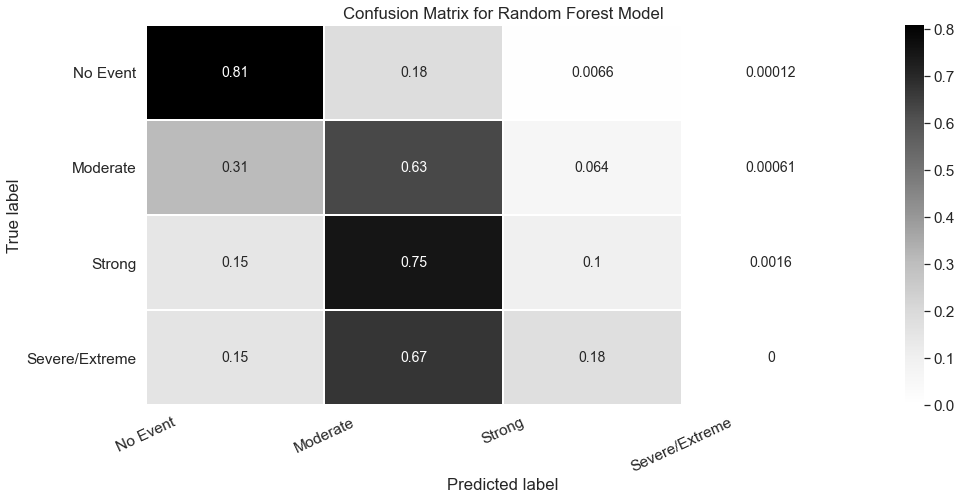

In [47]:
## Confusion Matrix

# Get and reshape confusion matrix data
matrix = confusion_matrix(labels_valid, yc_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':14},
            cmap=plt.cm.Greys, linewidths=0.2)

# Add labels to the plot
class_names = ['No Event','Moderate', 'Strong', 'Severe/Extreme'] # 'Severe','Extreme']
#class_names = ['Absence', 'Presence']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

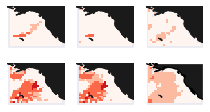

In [48]:
## Final model maps

cubes_7lag_1 = DS.cubes.isel(time=13063)
cubes_7lag_2 = DS.cubes.isel(time=13070)
cubes_7lag_3 = DS.cubes.isel(time=13793)
cubes_7lag_4 = DS.cubes.isel(time=13799)
cubes_270lag = DS.cubes.isel(time=13530)
cubes_560lag = DS.cubes.isel(time=13240)
lon = DS.lon
lat = DS.lat
lons = np.array(DS.lon)
lats =np.array(DS.lat)
lon_min=min(lon)
color='Reds'

ax1 = plt.subplot2grid((4, 5), (0, 0), colspan=1, projection=ccrs.PlateCarree()) 
plt.pcolormesh(X, Y, cubes_7lag_1,transform=ccrs.PlateCarree(), cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax1.coastlines(color = 'black', zorder=9)
ax1.add_feature(cft.LAND, facecolor='k',zorder=10)

ax2 = plt.subplot2grid((4, 5), (0, 1), colspan=1 , projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_2, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax2.coastlines(color = 'black', zorder=9)
ax2.add_feature(cft.LAND, facecolor='k',zorder=10)

ax3 = plt.subplot2grid((4, 5), (0, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_17_fin.pred_map_131017, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax3.coastlines(color = 'black', zorder=9)
ax3.add_feature(cft.LAND, facecolor='k',zorder=10)

ax4 = plt.subplot2grid((4, 5), (1, 0), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_3, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax4.coastlines(color = 'black', zorder=9)
ax4.add_feature(cft.LAND, facecolor='k',zorder=10)

ax5 = plt.subplot2grid((4, 5), (1, 1), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax5.coastlines(color = 'black', zorder=9)
ax5.add_feature(cft.LAND, facecolor='k',zorder=10)

ax6 = plt.subplot2grid((4, 5), (1, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_fin.pred_map_131019, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax6.coastlines(color = 'black', zorder=9)
ax6.add_feature(cft.LAND, facecolor='k')

#plt.savefig('/Users/katerinagiamalaki/Desktop/rf_mhw_local/Figure_3.jpg', dpi=600)

Text(26.5, 0.5, 'True label')

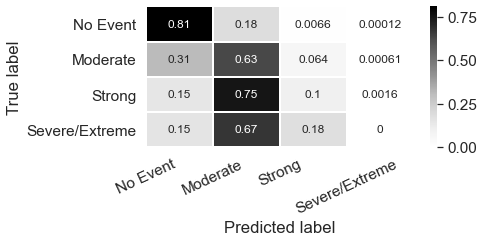

In [63]:
# Build the plot
ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=3, rowspan=2)
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':12}, cmap=plt.cm.Greys, linewidths=0.2)
# Add labels to the matrix
class_names = ['No Event','Moderate', 'Strong', 'Severe/Extreme'] # 'Severe','Extreme']
#class_names = ['Absence', 'Presence']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

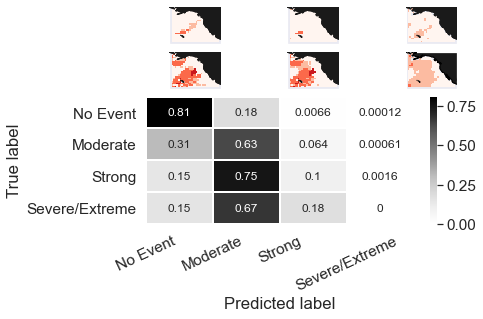

In [71]:
# Build the plot
ax1 = plt.subplot2grid((5, 3), (2, 0), colspan=3, rowspan=3)
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':12}, cmap=plt.cm.Greys, linewidths=0.2)
# Add labels to the matrix
class_names = ['No Event','Moderate', 'Strong', 'Severe/Extreme'] # 'Severe','Extreme']
#class_names = ['Absence', 'Presence']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Prediction Maps
ax2 = plt.subplot2grid((5, 3), (0, 0), colspan=1, projection=ccrs.PlateCarree()) 
plt.pcolormesh(X, Y, cubes_7lag_1,transform=ccrs.PlateCarree(), cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax2.coastlines(color = 'black', zorder=9)
ax2.add_feature(cft.LAND, facecolor='k',zorder=10)

ax3 = plt.subplot2grid((5, 3), (0, 1), colspan=1 , projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_2, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax3.coastlines(color = 'black', zorder=9)
ax3.add_feature(cft.LAND, facecolor='k',zorder=10)

ax4 = plt.subplot2grid((5, 3), (0, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_17_fin.pred_map_131017, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax4.coastlines(color = 'black', zorder=9)
ax4.add_feature(cft.LAND, facecolor='k',zorder=10)

ax5 = plt.subplot2grid((5, 3), (1, 0), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_3, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax5.coastlines(color = 'black', zorder=9)
ax5.add_feature(cft.LAND, facecolor='k',zorder=10)

ax6 = plt.subplot2grid((5, 3), (1, 1), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax6.coastlines(color = 'black', zorder=9)
ax6.add_feature(cft.LAND, facecolor='k',zorder=10)

ax7 = plt.subplot2grid((5, 3), (1, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_fin.pred_map_131019, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax7.coastlines(color = 'black', zorder=9)
ax7.add_feature(cft.LAND, facecolor='k')


# Setup PRcurve details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

ax8 = plt.subplot2grid((5, 3), (2, 0), colspan=3, rowspan=3)
plt.figure(figsize = (7, 8))
f_scores = np.linspace(0.2, 0.8, num = 4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(lines, labels, loc=(0, -.5), prop=dict(size=14))

plt.show()